# Dog Classifier
**In this project, we will create an image classification model which will classify an image of a dog between 120 categories.**

# Part 1: Getting the data ready

### Importing all of `FastAI vision` library

In [ ]:
from fastai.vision.all import *

### Declaring the Image Path

In [10]:
imagepath = Path("/kaggle/input/dog-breed-identification-data/train") # Path Class
imagepath

Path('/kaggle/input/dog-breed-identification-data/train')

In [11]:
imagepath.ls()

(#10222) [Path('/kaggle/input/dog-breed-identification-data/train/7d9c53fa846ea7e34bc3efa6830ab668.jpg'),Path('/kaggle/input/dog-breed-identification-data/train/04e3bb77c15c18fc1ac101d86d612f46.jpg'),Path('/kaggle/input/dog-breed-identification-data/train/2de892b241aeab50aad28c319eaebdbd.jpg'),Path('/kaggle/input/dog-breed-identification-data/train/bca88d42e4fc84b3169b13a615f5fdbf.jpg'),Path('/kaggle/input/dog-breed-identification-data/train/6496959bd5a27de3cb15e771ca2ae7b3.jpg'),Path('/kaggle/input/dog-breed-identification-data/train/51c7cc8287f557d11958afa02dd82c31.jpg'),Path('/kaggle/input/dog-breed-identification-data/train/4c178d8d592f1c9e8a7271946399236d.jpg'),Path('/kaggle/input/dog-breed-identification-data/train/0161847d5bfae154af084993fa26a1a7.jpg'),Path('/kaggle/input/dog-breed-identification-data/train/ad28b267501ce726440c9d5cae4e6f33.jpg'),Path('/kaggle/input/dog-breed-identification-data/train/f89aacf1761449fc76d665cce1399f33.jpg')...]

# Data Block
A data block is used for setting advanced parameters before converting to a `Data Loader`

#### 1: Create the DataBlock Object

In [12]:
dblock = DataBlock()

#### 2: Create the Dataframe from labels

In [13]:
df = pd.read_csv("/kaggle/input/dog-breed-identification-data/labels.csv")
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


#### 3: Create datasets from the Datablock
The datasets will have multiple tuples, each with a dependent and independent variable

In [14]:
datasets = dblock.datasets(df) # Dummy DLS with the labels data which is useless

**This now creates 2 datasets: Train, Valid**
Both variables now are dependent, we'll make image independent.

***Train Dataset:***

In [16]:
datasets.train[0:5]

[(Pandas(Index=3652, id='5ae8cb7df401c18656960ab5053757aa', breed='miniature_pinscher'),
  Pandas(Index=3652, id='5ae8cb7df401c18656960ab5053757aa', breed='miniature_pinscher')),
 (Pandas(Index=6809, id='ab0dd924f95990e2db5f4b65c606e4b8', breed='scotch_terrier'),
  Pandas(Index=6809, id='ab0dd924f95990e2db5f4b65c606e4b8', breed='scotch_terrier')),
 (Pandas(Index=8713, id='dac29948d89054e2ede1b957b53d3ec6', breed='wire-haired_fox_terrier'),
  Pandas(Index=8713, id='dac29948d89054e2ede1b957b53d3ec6', breed='wire-haired_fox_terrier')),
 (Pandas(Index=6248, id='9dece95cba6069a919447dfbb19f75e2', breed='great_dane'),
  Pandas(Index=6248, id='9dece95cba6069a919447dfbb19f75e2', breed='great_dane')),
 (Pandas(Index=8748, id='db466cbb0c6f243fa38cbd7c1ff6c7b4', breed='irish_terrier'),
  Pandas(Index=8748, id='db466cbb0c6f243fa38cbd7c1ff6c7b4', breed='irish_terrier'))]

***Valid Dataset:*** (For validation)

In [18]:
datasets.valid[0:5]

[(Pandas(Index=9785, id='f644ec58aab5f57925bd55969f4b925b', breed='kelpie'),
  Pandas(Index=9785, id='f644ec58aab5f57925bd55969f4b925b', breed='kelpie')),
 (Pandas(Index=458, id='0adfec2804a1efe41f54758cd87cec01', breed='border_collie'),
  Pandas(Index=458, id='0adfec2804a1efe41f54758cd87cec01', breed='border_collie')),
 (Pandas(Index=6343, id='9fddcca650e796157ab90ccebcfe36a4', breed='doberman'),
  Pandas(Index=6343, id='9fddcca650e796157ab90ccebcfe36a4', breed='doberman')),
 (Pandas(Index=1351, id='213bed7c726d8445f06640af7cc45d05', breed='welsh_springer_spaniel'),
  Pandas(Index=1351, id='213bed7c726d8445f06640af7cc45d05', breed='welsh_springer_spaniel')),
 (Pandas(Index=6747, id='a92a34eb1cd3fd3197ff0f2147251606', breed='malinois'),
  Pandas(Index=6747, id='a92a34eb1cd3fd3197ff0f2147251606', breed='malinois'))]

### 4: Define the Get X and Get Y Functions

#### Get X Function

In [19]:
def get_x(row):
    # All rows will be passed here.
    # Returning path of image ID in that row
    # independent variable
    slug = row["id"]+".jpg"
    return imagepath/slug

#### Get Y Function

In [20]:
def get_y(row):
    return row["breed"]

### 1B: Re-Creating the datablock with these functions

### Using Transforms
GPU doesn't know how to handle different sizes, so we transform all images to a standard type


In [21]:
datablock = DataBlock (
            blocks = (
                ImageBlock, # Independent Variable
                CategoryBlock # Dependent Variable
            ),
            get_x=get_x,
            get_y=get_y,
            item_tfms = RandomResizedCrop(128, min_scale=0.35), # Randomly crops every image
            splitter = RandomSplitter(0.2) # 20% for Validation Dataset (we can use valid_pct)
        )


### 3B: Re-Creating the datasets from the new datablock

In [22]:
datasets = datablock.datasets(df) 
# These datasets map the image to the labels??????

In [23]:
datasets.train[4] # Image is the independent variable

(PILImage mode=RGB size=500x435, TensorCategory(80))

TensorCategory(98) <-- 98th category of the 120 dog categories

Note: The image transformation will happen in dataloaders, so it has not happened yet

# Creating the DataLoaders

We will now convert the **Data Blocks** to **Data Loaders**
- Dataset is a complete tuple of data
- Data Loaders have it in batches, where we can mention the batch size

We will pass on data loaders to the model, not datasets.

In [24]:
dls = datablock.dataloaders(df) # dls is now the dataloaders object

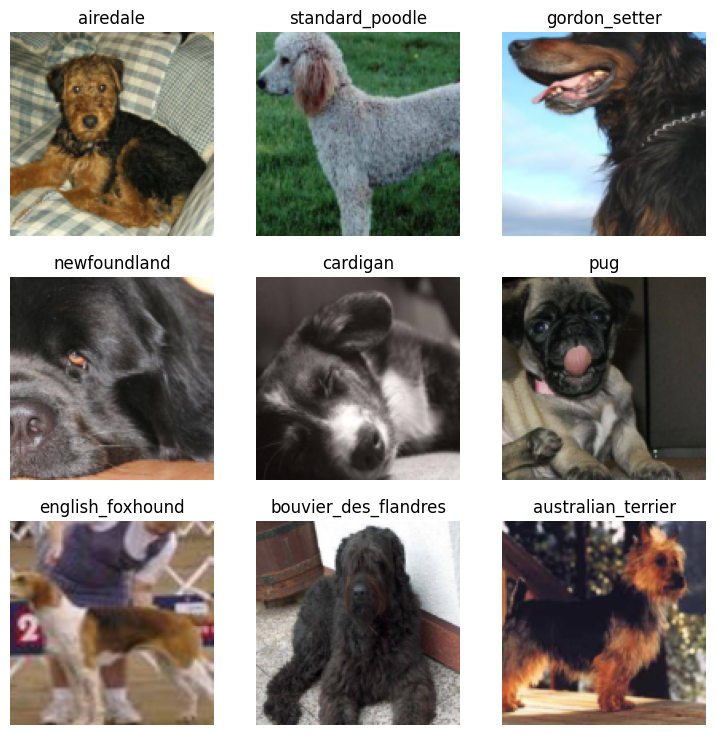

In [25]:
# Interactively display as a batch
dls.show_batch(
            nrows=3,
            ncols=3
)

# Creating Our Model

## Creating the Learner
We now create the vision learner, with an existing **architecture** (pre-trained model) which will later be fine tuned

In [51]:
learn = vision_learner(
					   dls, # Data Loader
					   resnet34, # Architecture, 34 is no. of layers
					   metrics=error_rate, # or 'accuracy' (1-e)
					   )

### Using The `lr_find` to determine the best learning rate
This will run the first step of training with all the learning rates and plot a graph against the loss.
This tells us the best learning rates without us needing to do trial and error to find out.

SuggestedLRs(minimum=0.006918309628963471, steep=0.009120108559727669, valley=0.0020892962347716093)

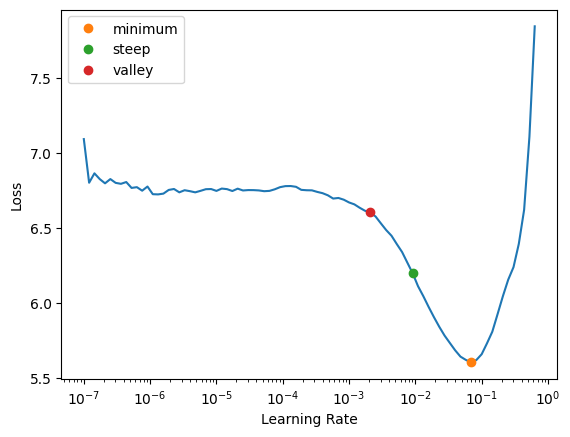

In [52]:
learn.lr_find(suggest_funcs=(minimum, steep, valley))
# The splitter causes a difference for everyone due to randomization

## Fine Tuning The Learner Object

In [53]:
learn.fine_tune(
                10, # No. Of Epochs
                base_lr = 0.009 # Learning Rate
)

epoch,train_loss,valid_loss,error_rate,time
0,3.083058,2.064139,0.489726,00:19


epoch,train_loss,valid_loss,error_rate,time
0,1.883162,1.606168,0.439335,00:20
1,1.869874,2.236648,0.551370,00:19
2,2.074103,2.289580,0.554795,00:20
3,1.839952,2.270938,0.545010,00:20
4,1.518185,2.131717,0.535225,00:19
5,1.199124,1.840631,0.464775,00:20
6,0.836804,1.744148,0.434442,00:20
7,0.545654,1.540117,0.392857,00:19
8,0.376811,1.515540,0.392368,00:20
9,0.329774,1.513216,0.394814,00:19


## Testing the Model with test images

In [63]:
learn.predict(Path("/kaggle/input/dog-breed-identification-data/test/001a5f3114548acdefa3d4da05474c2e.jpg"))


('tibetan_terrier',
 tensor(109),
 tensor([1.7566e-04, 9.4723e-05, 1.3956e-05, 9.7945e-07, 1.2571e-06, 1.6603e-06,
         3.1031e-06, 5.0992e-08, 3.8416e-06, 5.9192e-07, 8.2708e-07, 1.0384e-05,
         6.3476e-07, 4.2486e-05, 2.0043e-05, 3.0885e-06, 1.7072e-05, 8.6397e-05,
         2.2510e-06, 7.7335e-07, 2.2627e-04, 1.3114e-06, 1.0538e-05, 1.7092e-02,
         3.1757e-07, 7.7236e-04, 3.8495e-03, 3.2382e-06, 1.3774e-07, 3.2526e-07,
         5.4374e-06, 1.9211e-05, 1.4718e-05, 3.4670e-05, 1.9167e-07, 1.3857e-04,
         4.1519e-07, 3.1471e-07, 5.6301e-08, 1.0229e-06, 5.4689e-06, 1.3230e-05,
         2.1837e-06, 4.7405e-06, 4.5165e-07, 9.2940e-06, 2.6411e-06, 1.0022e-06,
         1.1982e-04, 3.7747e-06, 2.8208e-06, 2.8785e-06, 2.2558e-05, 4.8631e-06,
         1.3715e-07, 6.8362e-08, 6.8948e-07, 4.8267e-07, 6.8879e-07, 4.7535e-04,
         6.0235e-08, 1.1202e-04, 1.3186e-05, 1.5994e-07, 3.2962e-07, 3.4167e-04,
         3.7491e-06, 1.9512e-07, 9.7619e-07, 1.7604e-04, 7.7590e-02, 1.5396

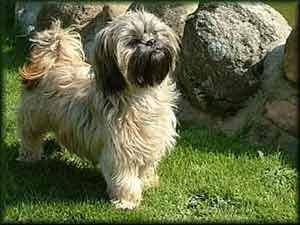

In [44]:
PILImage.create("/kaggle/input/dog-breed-identification-data/test/001a5f3114548acdefa3d4da05474c2e.jpg")

# Submission
We will now create the csv to submit to Kaggle

In [59]:
testpath = Path("/kaggle/input/dog-breed-identification-data/test")

In [ ]:
df_sub = pd.DataFrame({"id":[i.name.replace(".jpg", "") for i in get_image_files(testpath)]})
categories = sorted(list(df["breed"].unique()))
cols = {i:[] for i in categories}
for file_path in get_image_files(testpath):
    # Make prediction for the current image
    prediction = learn.predict(file_path)
    # Add the prediction to the DataFrame
    c=0
    for i in categories:
        cols[i].append(prediction[2][c])
        c+=1

In [66]:
df_a = pd.DataFrame(cols)
for i in df_a.columns:
    df_sub[i] = df_a[i].astype("float")
df_sub.to_csv("submissions.csv", index=False)